(10)=
# Chapter 10: Plotting with Seaborn

There are a number of plotting libraries available for Python including Bokeh, Plotly, and MayaVi; but the most prevalent library is still probably matplotlib. It is often the first plotting library a Python user will learn, and for good reason. It is stable, well supported, and there are few plots that matplotlib cannot generate. Despite its popularity, there are some drawbacks... namely, it can be quite verbose. That is, you may be able to generate nearly any plot, but it will take at least a few lines of code if not dozens to create and customize your figure.

One attractive alternative is the seaborn plotting library. While seaborn cannot generate the same variety of plots as matplotlib, it is good at generating a few common plots that people use regularly, and here is the key detail… it often does what would take matplotlib 10+ lines of code in only one or two lines. To make things even better, seaborn is built on top of matplotlib. This means that if you are not completely happy with what seaborn creates, you can fine tune it with the same matplotlib commands you already know! In addition, seaborn is designed to work closely with the pandas library. For example, think of all the lines of code you have typed to simply add labels to your *x*- and *y*-axes. Instead, seaborn often pulls the labels from the DataFrame column headers. Again, if you do not like this default behavior, you can still override it with `plt.xlabel()` and other commands that you already know.

By convention, seaborn is imported with the `sns` alias, but being that this is a relatively young library, it is unclear how strong this convention is. The [official seaborn website](https://seaborn.pydata.org/) uses it, so we will as well. All code in this chapter assumes the following import.

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

(10.1)=
## 10.1 Seaborn Plot Types

A map of the seaborn plotting library is mainly a series of the different types of plots that it can generate. Below is table of the main categories. The rest of this chapter is a more in-depth survey of select plotting functions, and it is certainly not a complete list.

**Table 1** Seaborn Plotting Type Categories Covered Herein

| Category | Description |
| :-----:  | :---------  | 
|Regression | Draws a regression line through the data |
|Categorical | Plots frequency versus a category |
|Distribution | Plots frequency versus a continuous value |
|Matrix | Displays the data as a colored grid |
|Relational | Visualizes the relationship between two continuous variables |

One distinction between some of the plotting categories above is whether they display continuous versus discrete/categorial information. When data are continuous, they can be nearly any value in a range like the density of a metal. This in contrast to discrete or categorial data that places data in a limited number of groups or bins such as the element(s) present in a metal sample.

(10.2)=
## 10.2 Regression Plots

Generating a regression line through data is a common task in science, and seaborn includes multiple plotting types that perform this task. All of the plots discussed below use a least square best fit and include a confidence interval for the regression line as a shaded region. Remember that there is uncertainty in both the slope and *y*-intercept for a regression line. If we were to plot all the possible variations of the regression line within the slope and intercept uncertainties, we get the regression confidence interval. By default, seaborn displays the 95% confidence interval, but this can be changed.

(10.2.1)=
### 10.2.1 regplot

The `regplot` generates a single scatter plot of data with a linear regression through the data points complete with a 95% confidence interval. The `sns.regplot()` function can take `x` and `y` positional arguments just like `plt.plot()`, but it also can take the *x* and *y* column names from a pandas DataFrame. Both approaches are demonstrated below. 

In [2]:
np.random.seed(18)

In [3]:
x = np.arange(10)
y = 2 * x + np.random.randn(10)

<AxesSubplot:>

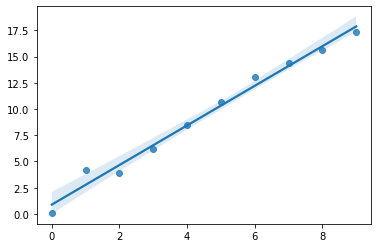

In [4]:
sns.regplot(x=x, y=y)

If the data is in a DataFrame, the *x* and *y* values can be provide as the column names, and seaborn will automatically add the column names as x and y labels. Below is a series of boiling point and molecular weights for various organic compounds.

In [5]:
bp = pd.read_csv('data/org_bp.csv')
bp

,bp,MW,type
0,65,32.04,alcohol
1,78,46.07,alcohol
2,98,60.10,alcohol
3,118,74.12,alcohol
4,139,88.15,alcohol
5,157,102.18,alcohol
6,176,116.20,alcohol
7,195,130.23,alcohol
8,212,144.25,alcohol
9,232,158.28,alcohol


If you choose to provide column names from a pandas DataFrame, you must also provide the name of the DataFrame using the `data` keyword argument.

<AxesSubplot:xlabel='MW', ylabel='bp'>

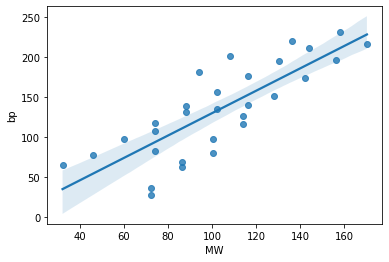

In [6]:
sns.regplot(x='MW', y='bp', data=bp)

While the DataFrame column names provide accurate axis labels, the units are missing. We can use matplotlib commands from chapter 3 to modify the axis labels.

Text(0, 0.5, 'bp, $^o$C')

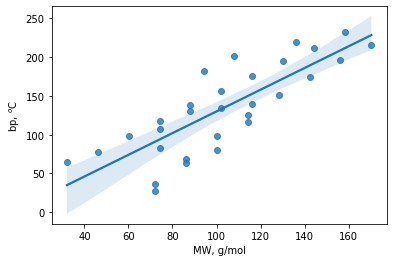

In [7]:
sns.regplot(x='MW', y='bp', data=bp)
plt.xlabel('MW, g/mol')
plt.ylabel('bp, $^o$C')

(10.2.2)=
## 10.2.2 lmplot

An `lmplot()` is very similar to the `regplot()` function except that an `lmplot()` also allows for multiple regressions based on additional pieces of information about each data point. For example, the *org_bp.csv* file above contains the boiling points of various alcohols and alkanes along with their molecular weights. Chemical intuition might bring one to expect two independent boiling point trends between the alcohol and alkanes, so we need two independent regression lines for the two classes of organic molecule. The `lmplot()` function can do exactly this.

The `lmplot()` function takes the *x* and *y* variables and the DataFrame name as either positional or keyword arguments, so the function call could also be as shown below where the first three arguments are positional arguments providing the *x*-values, *y*-values, and the DataFrame name in this order.

~~~python
sns.lmplot('MW', 'bp', bp, hue='type')
~~~

The `hue=` argument is the column name that dictates the color of the markers, so in this example, it will be the type of organic molecule.

Text(30.949635416666673, 0.5, 'bp, $^o$C')

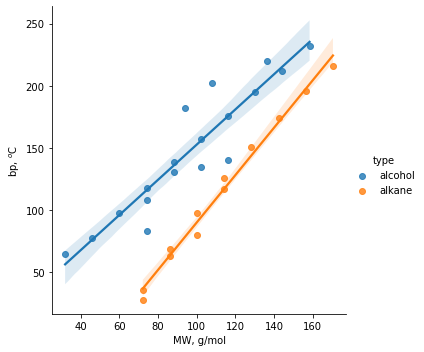

In [8]:
sns.lmplot(x='MW', y='bp', data=bp, hue='type')
plt.xlabel('MW, g/mol')
plt.ylabel('bp, $^o$C')

The `lmplot()` function also provides arguments for modifying the appearance of the plot. Below is a demonstration of a few extra adjustments to the plot. The `legend_out` argument controls whether the legend is outside the plot's boundaries, and the aspect argument sets the ratio of the *x*-axis versus the *y*-axis. The marker shapes can also be modified using the `markers` argument with matplotlib conventions from [section 3.1.2](3.1.2).

/Users/Demos/opt/anaconda3/lib/python3.9/site-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


Text(17.675000000000004, 0.5, 'bp, $^o$C')

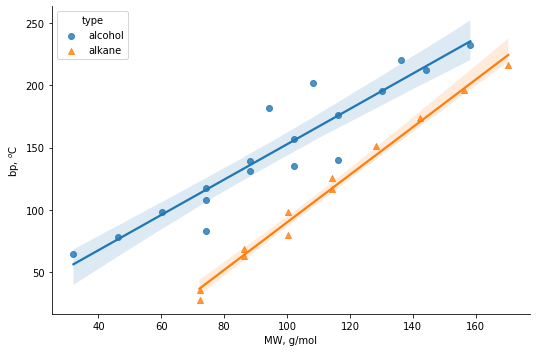

In [9]:
sns.lmplot(x='MW', y='bp', hue='type', data=bp, markers=['o', '^'], legend_out=False, aspect=1.5)
plt.xlabel('MW, g/mol')
plt.ylabel('bp, $^o$C')

(10.3)=
## 10.3 Categorical Plots

Categorical plots contain one axis of continuous values and one axis of discrete or categorical values. For example, if the density of three metals were measured repeatedly in lab, we would want to plot measured density (continuous) with respect to metal identity (categorial). Below are a few fictitious laboratory measurements for the densities of copper, iron, and zinc.

**Table 2** Density (g/mL) Measurements for Different Metals

| Cu  | Fe | Zn |
|:--:|:--:|:--:|
|8.51|7.95|6.79|
|9.49|7.53|7.06|
|8.48|8.09|7.96|
|9.40|7.44|7.06|
|8.83|8.38|6.69|
|9.45|7.83|7.21|
|8.73|6.88|7.35|
|9.00|7.90|6.65|
|8.84|8.51|7.41|
|9.32|7.89|7.89|

If we want to compare these values, the density can be plotted on the *y*-axis and metal on the *x*-axis. First, we need to load the values into a DataFrame.

In [10]:
labels = ['Cu', 'Fe', 'Zn']
densities = [[8.51, 7.95, 6.79],
             [9.49, 7.53, 7.06],
             [8.48, 8.09, 7.96],
             [9.40, 7.44, 7.06],
             [8.83, 8.38, 6.69],
             [9.45, 7.83, 7.21],
             [8.73, 6.88, 7.35],
             [9.00, 7.90, 6.65],
             [8.84, 8.51, 7.41],
             [9.32, 7.89, 7.89]]

In [11]:
df = pd.DataFrame(densities, columns=labels)
df.head()

,Cu,Fe,Zn
0,8.51,7.95,6.79
1,9.49,7.53,7.06
2,8.48,8.09,7.96
3,9.40,7.44,7.06
4,8.83,8.38,6.69


(10.3.1)=
## 10.3.1 Strip Plot

The simplest categorical plot function is `stripplot()` which generates a scatter plot with the *x*-axis as the categorical dimension and the *y*-axis as the continuous value dimension. By providing the function with the DataFrame, it will assume the columns are the categories.

<AxesSubplot:>

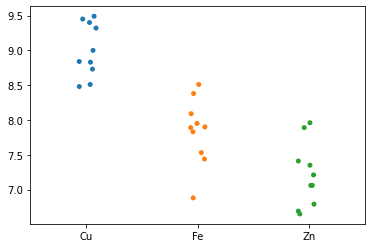

In [12]:
sns.stripplot(data=df)

By default, the *x*-axis contains the column labels from the DataFrame, but the *y*-axis is without any label. Again, one of the conveniences of the seaborn library is that it is built on top of matplotlib, so any plot created by seaborn can be further modified by matplotlib commands as shown below.

Text(0.5, 0, 'Metals')

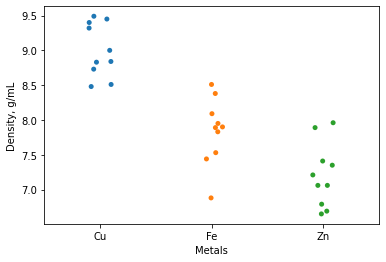

In [13]:
sns.stripplot(data=df)
plt.ylabel('Density, g/mL')
plt.xlabel('Metals')

(10.3.2)=
### 10.3.2 Swarm Plot

While the plots above are elegantly simple, they can make it difficult to accurately interpret the data when multiple data points are overlapping as can happen with larger numbers of data points. This obscures the quantity of points in various regions. One plot that alleviates this issue is the swarm plot which is almost identical to the strip plot except that points are no permitted to overlap to make the quantity more apparent.

Text(0.5, 0, 'Metals')

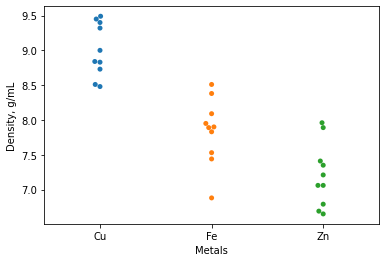

In [14]:
sns.swarmplot(data=df)
plt.ylabel('Density, g/mL')
plt.xlabel('Metals')

(10.3.3)=
### 10.3.3 Violin Plot

An additional option for understanding the density of points is the violin plot. By default, this plot renders a blob with the width representing the density of points at various regions. Inside the blob are miniature box plots (discussed in the next section) that provide more information about the distribution of data points.

Text(0.5, 0, 'Metals')

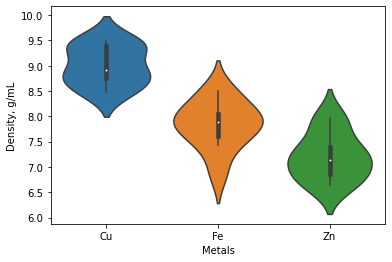

In [15]:
sns.violinplot(data=df)
plt.ylabel('Density, g/mL')
plt.xlabel('Metals')

(10.3.4)=
### 10.3.4 Box Plot

The box plot is a classic plot in statistics for representing the distribution of data and can be easily generated in seaborn using the `boxplot()` function which works much the same way as the above categorical plots. There are three main components to a box plot. The center box contains lines marking the 25, 50, and 75 percentile regions. For example, the 75 percentile line is where 75% of the data points are below. The 50 percentile is also known as the median. The length of the box (i.e., from 25 percentile to 75 percentile) is known as the *inner quartile range (IQR)*.  Beyond the box are the bars known as *whiskers* which mark the range of the rest of the data points up to 1.5x the IQR. If a data point is beyond 1.5x the IQR, it is an outlier and is explicitly represented with a spot (Figure 1)

![](img/box_plot_diagram.svg)

**Figure 1** A box plot is composed of a box with lines at the 25$^{th}$, 50$^{th}$, and 75$^{th}$ percentiles and whiskers that extend out to the rest of the non-outlier data points. If a data point is greater than 1.5 $\times$ the inner quartile range from the 25$^{th}$ or 75$^{th}$ percentiles, it is an outlier represented by a dot.

Text(0.5, 0, 'Metals')

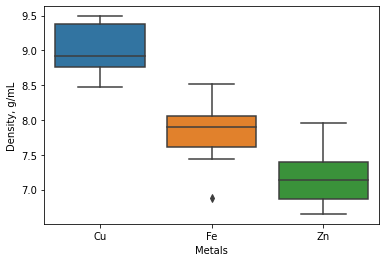

In [16]:
sns.boxplot(data=df)
plt.ylabel('Density, g/mL')
plt.xlabel('Metals')

(10.3.5)=
### 10.3.5 Count Plot

The count plot represents the frequency of values for different categories. This is similar to a histogram plot except that a histogram's *x*-axis is a continuous set of values while a count plot's *x*-axis is made up of discrete categories. The `countplot()` function accepts a raw collection of responses, tallies them up, and plots them as a labeled bar plot. For example, if we have a data set of all the chemical elements up to rutherfordium (Rf) and their physical state under standard conditions, the function accepts the list of their physical states, counts them, and generates the plot.

In [17]:
elem = pd.read_csv('data/elements_data.csv')
elem.head()

,symbol,AN,row,block,state
0,H,1,1,s,gas
1,He,2,1,s,gas
2,Li,3,2,s,solid
3,Be,4,2,s,solid
4,B,5,2,p,solid


<AxesSubplot:xlabel='state', ylabel='count'>

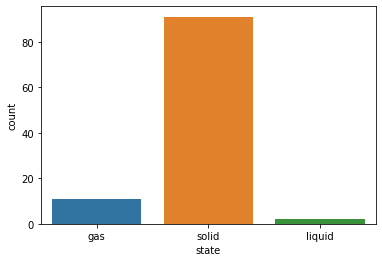

In [18]:
sns.countplot(x='state', data=elem)

Like many plotting types in seaborn, the count plot can be further customized through keyword arguments and using other available data. One shortcoming of the above plot is that the states are listed in the order they first appear in the data set instead of based on disorder. We can assert a different order by providing the `order` argument as a list of how the states should appear.

<AxesSubplot:xlabel='state', ylabel='count'>

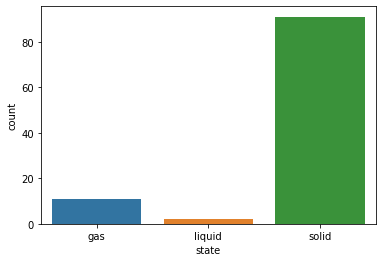

In [19]:
sns.countplot(x='state', data=elem, order=['gas', 'liquid', 'solid'])

We can also set the color of each bar based on the valence orbital block by providing the `hue` argument with the name of the column.

<AxesSubplot:xlabel='state', ylabel='count'>

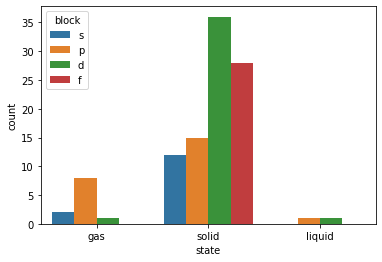

In [20]:
sns.countplot(x='state', hue='block', data=elem)

(10.4)=
## 10.4 Distribution Plots

Seaborn provides a set of plotting types that represent the distribution of data. These are essentially extensions of the histogram plot but with extra features like additional dimensions, kernel density estimates, and generating grids of histogram plots.
    
(10.4.1)=    
### 10.4.1 histplot

The `histplot()` function is one of the most basic distribution plotting functions in seaborn. This function is similar to the matplotlib `plt.hist()` function except that seaborn brings a few extra options like setting the color (`hue=`) based on a particular column of data.

To demonstrate this, we will use the results of a one-dimensional stochastic diffusion simulation. During the individual steps of this simulation, each of a thousand simulated molecules are either moved to the right one unit, to the left one unit, or not moved at all. A random number generator dictates this movement as demonstrated below.

In [21]:
np.random.seed(18)

In [22]:
loc = np.zeros(1000)   # locations of molecules
for step in range(1000):
    loc += np.random.randint(-1, high=2, size=1000)

Text(0, 0.5, 'Fraction of Molecules')

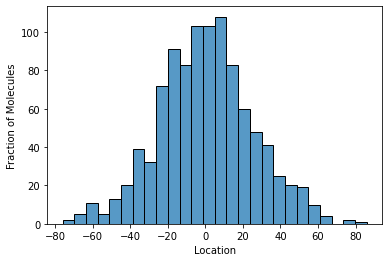

In [23]:
sns.histplot(loc)
plt.xlabel('Location')
plt.ylabel('Fraction of Molecules')

(10.4.2)=
### 10.4.2 kde Plot

The `kdeplot()` function is very similar to the `histplot()` except that it fits the histogram with a kernel density estimates (kde) curve. This curve is basically just a smoothed curve over the data to help visualize the overall trend.

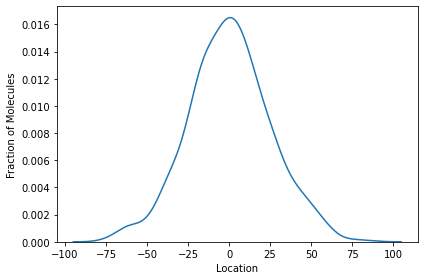

In [24]:
sns.kdeplot(loc)
plt.xlabel('Location')
plt.ylabel('Fraction of Molecules')
plt.tight_layout()

(10.4.3)=
### 10.4.3 jointplot (diffusion simulation)

A joint plot can be described as a scatter plot with histograms on the sides providing additional information or clarification on the density of the data points. To demonstrate this, below is a two dimensional stochastic diffusion simulation and the results. The principles are the same as above except applied to two dimensions.

In [25]:
np.random.seed(18)

In [26]:
x = np.sum(np.random.randint(-1, high=2, size=(5000,100000)), axis=0)
y = np.sum(np.random.randint(-1, high=2, size=(5000,100000)), axis=0)

(-286.9, 282.9, -305.4, 275.4)

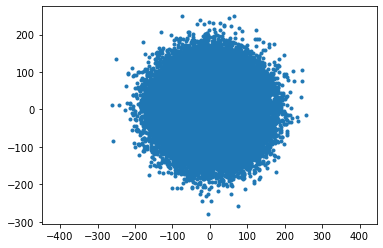

In [27]:
plt.plot(x, y, '.')
plt.axis('equal')

One of the issues with this plot is that there are so many data points in the plot that it is difficult to determine the distribution/density inside the blanket of solid dots. The seaborn joint plot adds histograms to the side to help the viewer recognize where most of the data points reside.

The joint plot function, `sns.jointplot()`, takes two required arguments of the `x` and `y` variables. While this function does not require the use of pandas or a DataFrame, it is convenient because the axis labels are pulled directly from the column headers.

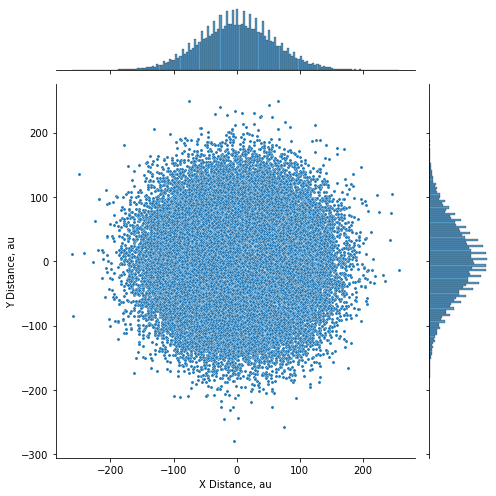

In [28]:
df = pd.DataFrame(data={'X Distance, au': x, 'Y Distance, au': y})

sns.jointplot(x=df['X Distance, au'], y=df['Y Distance, au'], 
              height=7, color='C0', joint_kws={'s':10})
plt.tight_layout()

There are numerous arguments to fine tune the joint plot. For example, the joint plot does not need to be a scatter plot with histograms. The density of the data points can be represented with hexagonal patches or *kernel density estimates (kde)*. The latter represents the density of points through contours and is a reoccurring option in other plotting functions in the seaborn library. It is worth noting that the kde plotting types take a little time to calculate, so expect a brief delay in generating these plots.

Below, the hexagonal joint plot was generated with a color bar on the side using the matplotlib `plt.colorbar()` command. As with all seaborn plots, the plot can be customized using matplotlib commands.

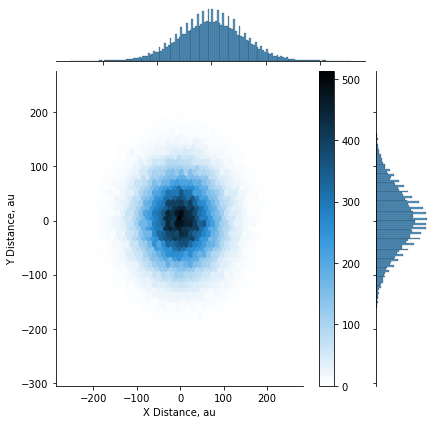

In [29]:
sns.jointplot(x=df['X Distance, au'], y=df['Y Distance, au'], kind='hex')
plt.colorbar()

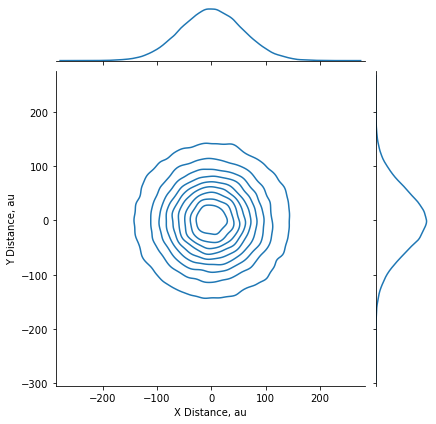

In [30]:
sns.jointplot(x=df['X Distance, au'], y=df['Y Distance, au'], kind='kde')

(10.5)=
## 10.5 Pair Plot

The pair plot belongs to the category of distribution plots, but it is different enough to be worth addressing separately. A pair plot is designed to show the relationship among multiple variables by generating a grid of plots in a single figure. Each plot in the grid is a scatter plot showing the relationship between two of the variables on either axis with the exception of the plots in the diagonals. Because the diagonal plots are the intersection between a variable and itself, these are histograms showing the distributions of values for that variable. Pair plots are particularly useful for looking at new data to see if there are any trends worth investigating because this entire grid can be easily generated with a single `sns.pairplot()` function.

To demonstrate a pair plot, the file *periodic_trends.csv* contains physical data on non-noble gas elements in the first three rows of the periodic table. To quickly see how each of the columns of data relate to each other, we will generate a pair plot. 

In [31]:
per = pd.read_csv('data/periodic_trends.csv')
per.head()

,symbol,AN,EN,row,IE_kJ,radius_pm
0,H,1,2.1,1,1310,38
1,Li,3,1.0,2,520,134
2,Be,4,1.5,2,900,90
3,B,5,2.0,2,800,82
4,C,6,2.5,2,1090,77


In [32]:
per.drop(['AN', 'symbol'], axis=1, inplace=True)
per.head()

,EN,row,IE_kJ,radius_pm
0,2.1,1,1310,38
1,1.0,2,520,134
2,1.5,2,900,90
3,2.0,2,800,82
4,2.5,2,1090,77


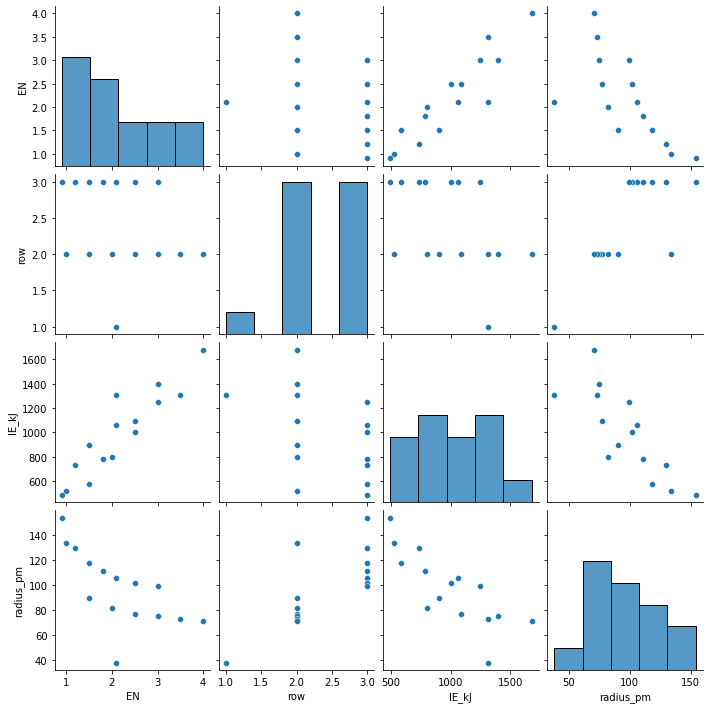

In [33]:
sns.pairplot(per)

The color can also be set based on any piece of information. Below, the row is used to dictate the color of each data point.

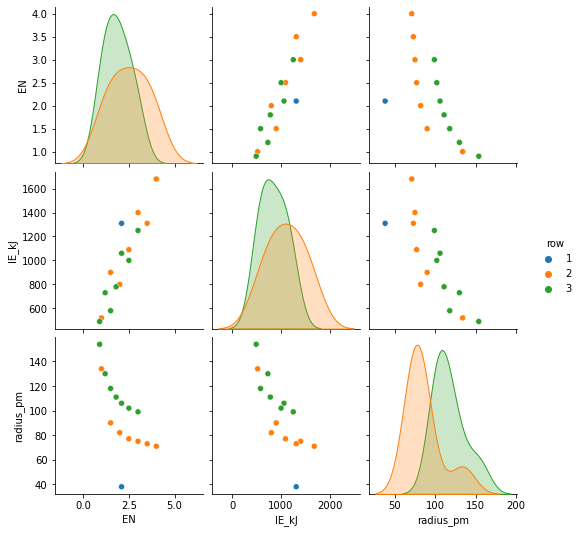

In [34]:
sns.pairplot(per, hue='row', palette='tab10')

(10.6)=
## 10.6 Heat Map

Heat maps are color representations of 2D grids of numerical data and are ideal for making large tables of values easily interpretable. As an example, we can import a table of bond dissociation energies (in kJ/mol) and visualize these data as a heat map. In the following pandas function call, the `index_col=0` tells pandas to apply the first column as column headers as well.

In [35]:
bde = pd.read_csv('data/bond_enthalpy_kJmol.csv', index_col=0)
bde

,H,C,N,O,F
H,436,415,390,464,569
C,415,345,290,350,439
N,390,290,160,200,270
O,464,350,200,140,160
F,569,439,270,160,160


This grid of numerical values is difficult to quickly interpret, and if it were a larger table of data, it could become almost impossible to interpret in this form. We can plot the heat map using the `heatmapt()` function and feeding it the DataFrame. The function also accepts NumPy arrays, but without the index and column labels of a DataFrame, the axes will not be automatically labeled.

<AxesSubplot:>

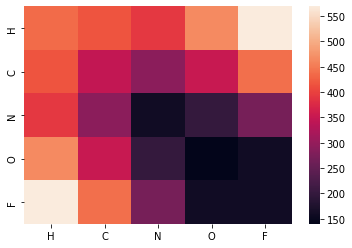

In [36]:
sns.heatmap(bde)

Now we have a color grid where the colors represent numerical values defined in a colorbar automatically displayed on the righthand side. This default color map can easily be customized through various arguments in the `heatmap()` function. One nice addition is to display the numerical values on the heat map by setting `annot=True`. If you choose to annotate the rectangles, you may need to use the `fmt=` parameter to dictate the format of the annotation labels. Some common formats are `d` for decimal, `f` for floating point, and `.2f` gives two places after the decimal place in a floating point number. If you want a different color map, this can be set using the `cmap` argument and any [matplotlib colormap](https://matplotlib.org/stable/tutorials/colors/colormaps.html) you want. Below, the annotation is turned on with the perceptually uniform viridis colormap.

<AxesSubplot:>

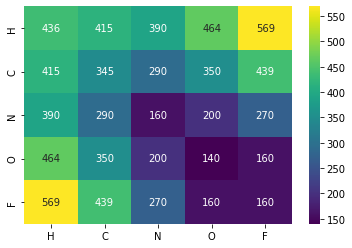

In [38]:
sns.heatmap(bde, annot=True, fmt='d', cmap='viridis')

(10.7)=
## 10.7 Relational Plots

Relational plots are a new addition to the seaborn library as of version 0.9 and include seaborn's functions for scatter and line plots. Of course, matplotlib does a nice job making scatter and line plots reasonably easy, but seaborn offers a few extra ease-of-use improvements upon matplotlib that may be worth something to you depending upon your needs.  

(10.7.1)=
### 10.7.1 Scatter Plots

One difference between seaborn and matplotlib in generating scatter and line plots is that seaborn allows the user to change the color, size, and marker styles of individual markers based on numerical values or text data. Matplotlib can also change the color and size of the markers but only based on numerical values, and to change the marker style, the  `plt.scatter()` function needs to be called a second time. Seaborn allows this whole process in a single function call.

Below, we are using the periodic trends data (`per`) imported in [section 10.5](10.5). We can start with plotting the electronegativity (`EN`) versus the atomic radius (`radius_pm`) using the `sns.scatterplot()` function which takes many of the same basic arguments as plots we have seen so far with seaborn.

In [ ]:
sns.scatterplot(x='radius_pm', y='EN', data=per)

To modify the color, size, and marker style of the data points, use the `hue`, `size`, and `marker` arguments. This allows additional information to be infused into a single plot. Note that the legend automatically appears on the plot. In addition, the colormap for the plot can be modified using the `palette` keyword argument and the name of any matplotlib colormap.

In [ ]:
sns.scatterplot(x='radius_pm', y='EN', data=per,  hue='IE_kJ', 
                size='IE_kJ', style='row', palette='winter')

(10.7.2)=
### 10.7.2 Line Plots

The `lineplot()` function in seaborn is somewhat similar to the `plt.plot()` function in matplotlib except it also includes a number of extra features similar to those seen in other seaborn plotting functions. This includes the ability to change the plotting color and style based on additional information, easy visualization of confidence intervals, automatic generation of a legend, and others. To demonstrate the `lineplot()` function, we will import simulated kinetic data for a first-order chemical reaction run seven times (i.e., runs 0 $\rightarrow$ 6).

In [ ]:
kinetics = pd.read_csv('data/kinetic_runs.csv')
kinetics.head()

In [ ]:
sns.lineplot(x='time', y='[A]', data=kinetics, hue='run', palette='viridis')
plt.xlabel('Time, s')
plt.ylabel('[A], M')

The `[A]` was plotted versus `Time`, and the hue of each line was set to the `Run` number. The result is that each kinetic run is shown in a separate color. If the user is not concerned so much with seeing the individual runs but instead wants to see an average of each all the runs with some indication of the variation, the `lineplot()` function provides a default 95% confidence interval as is shown below.

In [ ]:
sns.lineplot(x='time', y='[A]', data=kinetics)
plt.xlabel('Time, s')
plt.ylabel('[A], M')

A confidence interval is only shown if there are multiple data points for each time. The confidence intervals can also be represented with error bars by setting `err_style = 'bars'`.

In [ ]:
sns.lineplot(x='time', y='[A]', data=kinetics, err_style='bars')
plt.xlabel('Time, s')
plt.ylabel('[A], M')

(10.8)=
## 10.8 Internal Data Sets

Similar to a number of other Python libraries, seaborn brings with it data sets for users to experiment with. These are callable using the `sns.load_datasets()` function with the name of the data set as the argument. Below is a table describing a few of the available Seaborn data sets. This list may change, so you can use the `sns.get_dataset_names()` to see the most current list. 

**Table 3** A Few Data Sets Available in Seaborn

| Name   |  Description  |
|:-----: | :-------:     |
|`anscombe`|Anscombe's quartet data with four artificial data sets that exhibit the same mean, standard deviation, and linear regression among other statistical descriptors |
|`car_crashes` | Data on car crashes including mph above the speed limit among other information |
|exercise | Diet and exercise data |
|flights | Aircraft flight information including year, month, and number of passengers |
|iris | Ronald Fisher's famous iris data set used frequently in machine learning classification examples |
|planets | Information on discovered planets |
|tips | Restaurant information including bill total, tip, and information about the client |
|titanic | Titanic survivor data set |


## Further Reading
    
1. Seaborn Website. [https://seaborn.pydata.org/](https://seaborn.pydata.org/) (free resource)

## Exercises

1. Import the file **linear_data.csv** and visualize it using a [regression plot](10.2).

2. Import the file titled **ir_carbonyl.csv** and visualize the carbonyl stretching frequencies using a seaborn [categorical plot](10.3). Represent the different molecules with different colors.

3. Import the file titled **ir_carbonyl.csv** containing carbonyl stretches of ketones and aldehydes.

    a) Separate the ketones and aldehydes values into individual Series.

    b) Visualize the distribution of both ketone and aldehyde carbonyl stretches using a [kde plot](10.4.2).

4. Import the **elements_data.csv** file and generate a [count plot](10.3.5) showing the number of elements in each block of the periodic table (i.e., s, p, d, f).

5. The following equation is Plank's law which describes the relationship between the radiation intensity($M$) with respect to wavelength ($\lambda$) and temperature ($T$).

    $$ M = \frac{2 \pi hc^2}{\lambda ^5 (e^{hc/\lambda kT} - 1)} $$

    Import the data called ***blackbody.csv*** containing intensities at various temperatures and wavelengths         based on Plank's law. Generate a plot of intensity versus wavelength using the `lineplot()` function, and         display the different temperatures as different colors.

6. Import the file **ionization_energies.csv** showing the first four ionization energies for a number of elements. Plot this grid of data as a [heat map](10.6). Include labels in each cell using the `annot=` argument.

7. Import the file **ROH_data_small.csv** and plot visualize how boiling point (bp), molecular weight (MW), degree, and whether a compound is aliphatic are correlated using a [pairplot](10.5).

8. The following code generates the radial probability plot for hydrogen atomic orbitals for n = 1-4 see [section 3.1](3.1) and determines the radius of maximum probability (see [section 6.1.1](6.1.1)). These values are combined into a pandas DataFrame called `max_prob` where the rows are the principle quantum numbers and columns are the angular quantum numbers. Display the DataFrame using a heatmap. Your heatmap should include numerical labels on each colored block on the heatmap, and you should select a non-default, perceptually uniform colormap for your colormap. 

~~~python
import numpy as np
import pandas as pd
import sympy
from sympy.physics.hydrogen import R_nl

R = sympy.symbols('R')
r = np.arange(0,60,0.01)

max_radii = []

for n in range(1,5):
    shell_max_radii = []
    for l in range(0, n):
        psi = R_nl(n, l, R)
        f = sympy.lambdify(R, psi, 'numpy')
        max = np.argmax(f(r)**2 * r**2)
        shell_max_radii.append(max/100)
    max_radii.append(shell_max_radii)    
    
columns, index = (0,1,2,3), (4,3,2,1)
max_prob = pd.DataFrame(reversed(max_radii), columns=columns, index=index)
max_prob
~~~